## 2 dimensional Schroedinger's equation solutions

In [13]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import eigsh

import matplotlib.pyplot as plt
from matplotlib import animation

In [9]:
Rbenchmark = 0.4
mass = 511e3

def V_inversquare(x, y):
    return -1/((x**2 + y**2) + 1e-10)

def V_circular_inf_well(x, y):
    return np.where( np.sqrt(x**2 + y**2) < R, 0, 1e10)

def V_circular_well(x, y, V0=1e-1, R=Rbenchmark):
    return np.where( np.sqrt(x**2 + y**2) < R, V0, 0)

def V_square_inf_well(x, y):
    return np.where((np.abs(x) < R) & (np.abs(y) < R), 0, 1e10)

def V_sin(x, y):
    return np.sin(2*np.pi*x)**2

In [29]:
def solve_Hamiltonian(V, n_levels=30, npoints=100, mass=1):
    
    # spatial grids
    xmin, xmax = -1, 1
    ymin, ymax = -1, 1
    X, Y = np.meshgrid(np.linspace(xmin,xmax, npoints), np.linspace(ymin,ymax, npoints))
    dx = 2/npoints
    dy = 2/npoints

    diag = np.ones([npoints])
    diags = np.array([diag, -2*diag, diag])
    D = sparse.spdiags(diags, np.array([-1,0,1]), npoints, npoints)
    T = -1/(2*mass) * sparse.kronsum(D,D)
    U = sparse.diags(V(X,Y).reshape(npoints**2), (0))
    H = T + U
    en, psi = eigsh(H, k=n_levels, which='SM')

    # NOTE: CHECK THIS! Is this transpose + reshaping operation swapping the x and y axes?
    psi = psi.T.reshape(([n_levels, npoints, npoints])) 
    inds = np.argsort(en)
    en = en[inds]
    psi = psi[inds]
    
    return en, psi

In [31]:
E_circ_inf, psi_circ_inf = solve_Hamiltonian(V_circular_inf_well)
E_square_inf, psi_square_inf = solve_Hamiltonian(V_square_inf_well)
E_r2, psi_r2 = solve_Hamiltonian(V_inversquare)
E_sin, psi_sin = solve_Hamiltonian(V_sin)

ArpackNoConvergence: ARPACK error -1: No convergence (100001 iterations, 0/30 eigenvectors converged)

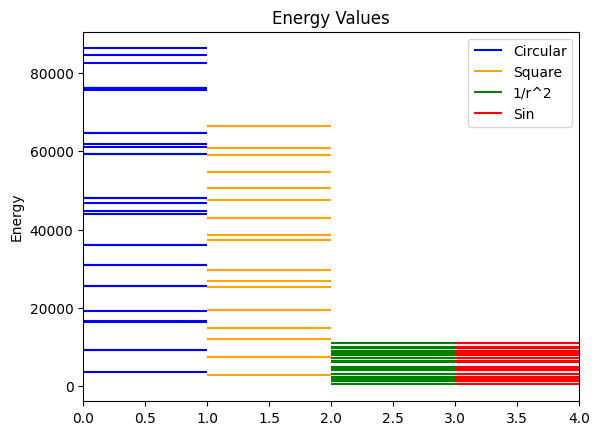

In [12]:
fig, ax = plt.subplots()

ax.hlines(E_circ_inf, 0, 1, colors='blue', label='Circular')
ax.hlines(E_square_inf, 1, 2, colors='orange', label='Square')
ax.hlines(E_r2, 2, 3, colors='green', label='1/r^2')
ax.hlines(E_sin, 3, 4, colors='red', label='Sin')
ax.legend()
ax.set_xlim(0, 4)
ax.set_ylabel('Energy')
ax.set_xlabel('')
ax.set_title('Energy Values')
fig.savefig('plots/energy_levels.png', dpi=300)

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_22840/2082014613.py:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, psi_r2[i]**2, levels=LEVELS, colors='green', linewidth=0.5, linestyles=[(1,(2,1))])
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_22840/2082014613.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, psi_square_inf[i]**2, levels=LEVELS, colors='orange', linewidth=0.5, linestyles=[(1,(5,2))])
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_22840/2082014613.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, psi_circ_inf[i]**2, levels=LEVELS, colors='dodgerblue', linewidth=0.5)


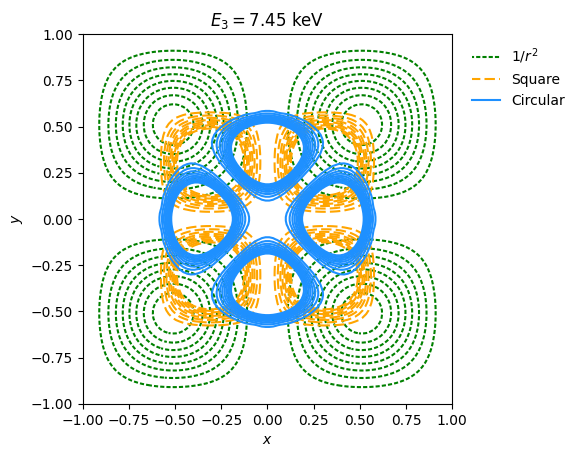

In [20]:
import matplotlib.lines as mlines

fig = plt.figure()
ax = plt.axes()

i=3
LEVELS = np.linspace(0, np.max(psi_r2[i]**2), 10)
ax.contour(X, Y, psi_r2[i]**2, levels=LEVELS, colors='green', linewidth=0.5, linestyles=[(1,(2,1))])
ax.contour(X, Y, psi_square_inf[i]**2, levels=LEVELS, colors='orange', linewidth=0.5, linestyles=[(1,(5,2))])
ax.contour(X, Y, psi_circ_inf[i]**2, levels=LEVELS, colors='dodgerblue', linewidth=0.5)
ax.set_title(rf'$E_{{{i}}} = {E_circ_inf[i]/1e3:.2f}$ keV', fontsize=12)

# Create custom legend handles
green_line = mlines.Line2D([], [], color='green', linewidth=1.5, linestyle=(1,(2,1)), label=r'$1/r^2$')
orange_line = mlines.Line2D([], [], color='orange', linewidth=1.5, linestyle=(1,(5,2)), label='Square')
blue_line = mlines.Line2D([], [], color='dodgerblue', linewidth=1.5, linestyle='-', label='Circular')

# Add legend
ax.legend(handles=[green_line, orange_line, blue_line], frameon=False, loc='upper left', fontsize=10, ncol=1, bbox_to_anchor=(1.02, 1))

# Plot the surface.
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')
fig.savefig(f'plots/wavefunctions_comparison_{i}.png', dpi=300, bbox_inches='tight')

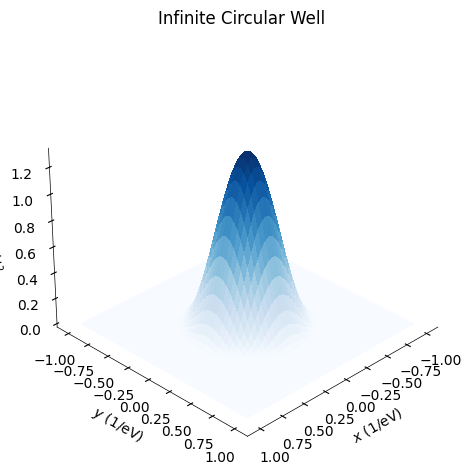

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')

i=0
ax.plot_surface(X, Y, psi_circ_inf[i]**2*1e3, cmap='Blues', cstride=2, rstride=2, linewidth=1, antialiased=False)

# Set the title and adjust the axes properties
ax.set_title(rf'Infinite Circular Well', fontsize=12)
ax.set_facecolor('none')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.set_zlim(0, 0.6)
ax.set_xlabel('$x$ (1/eV)')
ax.set_ylabel('$y$ (1/eV)')
ax.set_zlabel(r'$|\psi(x,y)|^2$', rotation=90)

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.line.set_linewidth(0.5)

ax.view_init(elev=30, azim=45)
fig.tight_layout()
fig.savefig(f'plots/wavefunctions_inf_circ_{i}.png', dpi=300, bbox_inches='tight')


/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_22840/3879340906.py:33: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax_2d.contourf(X, Y, psi_circ_inf[i]**2, levels=40, cmap=COLORMAP, linewidth=0.5, antialiased=False)


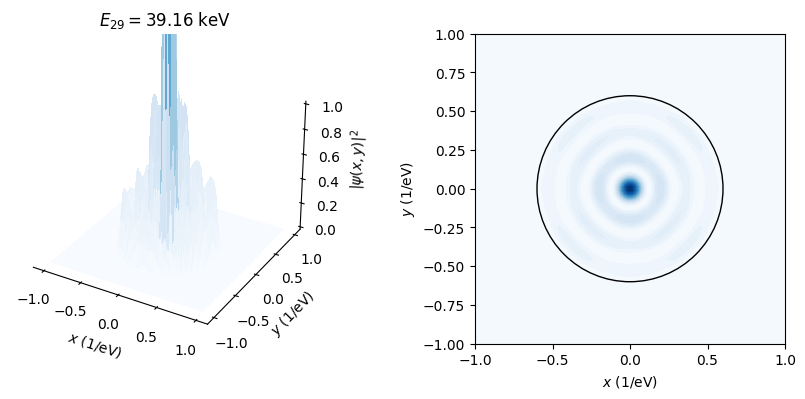

In [25]:
from matplotlib.patches import Circle

fig = plt.figure(figsize=(10, 5))
COLORMAP='Blues'

# Create the 3D axis
ax_3d = fig.add_subplot(121, projection='3d')
ax_3d.set_facecolor('none')
ax_3d.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax_3d.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax_3d.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax_3d.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax_3d.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax_3d.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)

# Create the 2D axis for contourf
ax_2d = fig.add_subplot(122)
ax_2d.set_aspect('equal')  # Set aspect ratio to be equal

# Add separation between the two axes
fig.subplots_adjust(wspace=0.5)

def init():

    return fig,

def animate(i):
    ax_3d.clear()
    ax_3d.plot_surface(X, Y, psi_circ_inf[i]**2*1e3, cmap=COLORMAP, cstride=2, rstride=2, linewidth=1, antialiased=False)
    ax_3d.set_zlim(0, 1)

    ax_2d.clear()
    ax_2d.contourf(X, Y, psi_circ_inf[i]**2, levels=40, cmap=COLORMAP, linewidth=0.5, antialiased=False)

    ax_2d.set_xlabel('$x$ (1/eV)')
    ax_2d.set_ylabel('$y$ (1/eV)')
    ax_3d.set_xlabel('$x$ (1/eV)')
    ax_3d.set_ylabel('$y$ (1/eV)')
    ax_3d.set_zlabel(r'$|\psi(x,y)|^2$', rotation=90)
    ax_3d.set_title(rf'$E_{{{i}}} = {E_circ_inf[i]/1e3:.2f}$ keV', fontsize=12)
    circle = Circle((0, 0), R, edgecolor='black', linewidth=1, fill=False)
    
    ax_2d.add_patch(circle)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=1)
ani.save('plots/eigenvectors_3d_contourf.gif', writer='pillow', fps=1.5)